In [8]:
import matplotlib.pyplot as plt
import os
%matplotlib inline

 XI.9.16

In [9]:
!rm -f task7_2_data/*
!cd comp_math_rs && cargo run --release --bin task7_2

   Compiling comp_math_rs v0.1.0 (/home/vlad/Documents/VSCode/MiptCompMath/comp_math_rs)
    Finished `release` profile [optimized] target(s) in 0.62s              
     Running `target/release/task7_2`


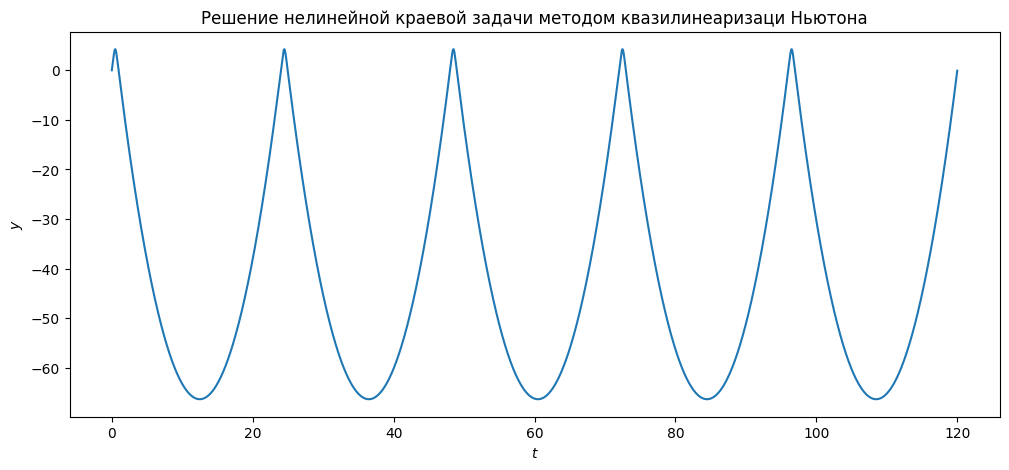

tau: 0.001

self value: 11.430885139591654
execution time: 0.047883382 seconds


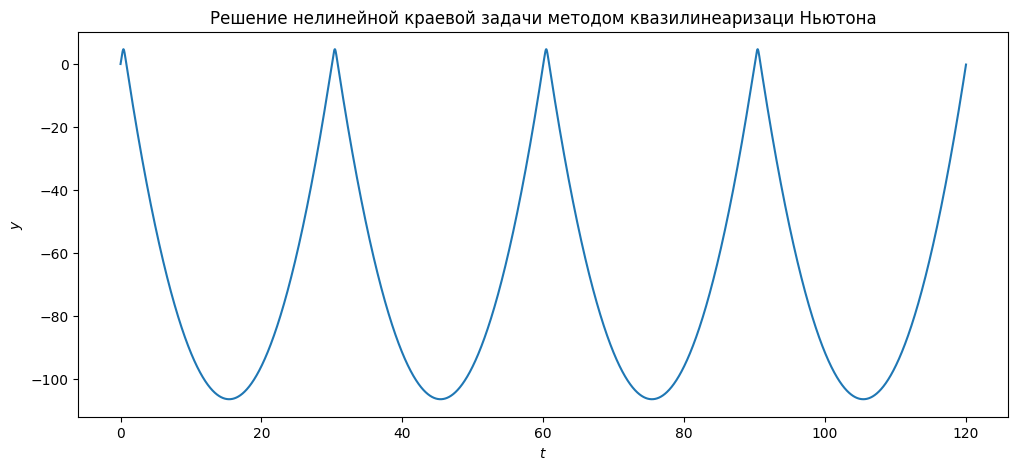

tau: 0.001

self value: 14.51918236214734
execution time: 0.120381316 seconds


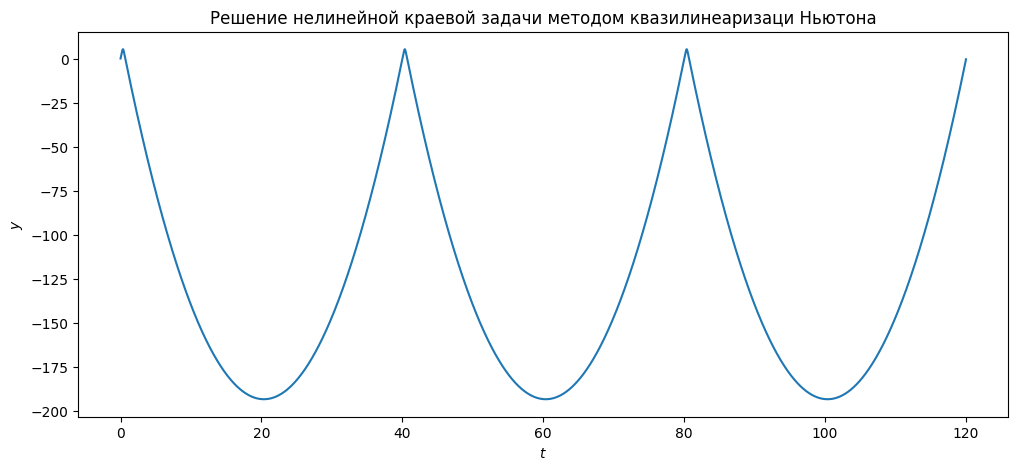

tau: 0.001

self value: 19.61529706800104
execution time: 0.050930787 seconds


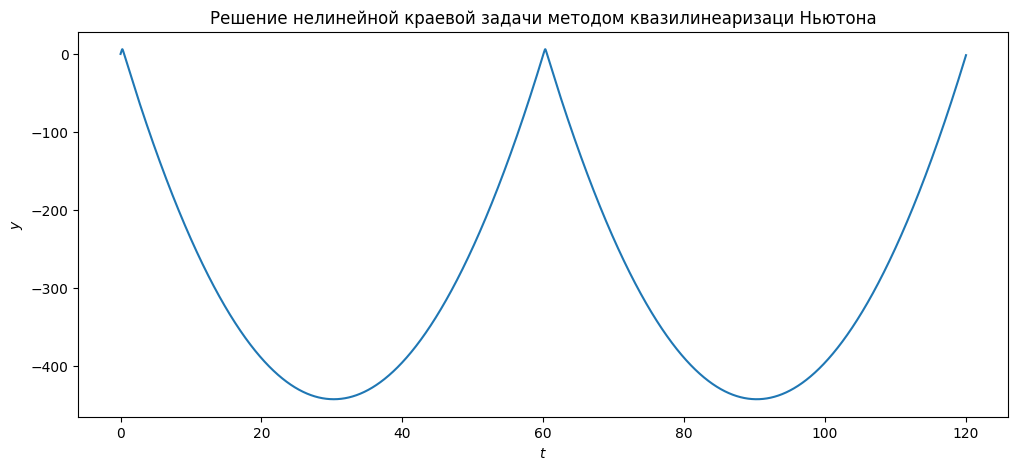

tau: 0.001

self value: 29.728452821377363
execution time: 0.053389176 seconds


In [11]:
directory = "task7_2_data"

files = os.listdir(directory)
files = sorted(files, key=lambda s: int(s.split('.')[0]))

self_values = []

for file in files:
    # print(file)
    if not file.endswith(".csv"):
        continue
    with open(f"{directory}/{file}", "r") as f:
        f.readline()
        tau = f.readline()
        self_value = float(f.readline())
        duplicate = False
        if self_value < 10:
            continue
        for val in self_values:
            if abs(val - self_value) < 1e-1:
                duplicate = True
        if duplicate:
            continue
        self_values.append(self_value)
        duration = f.readline()
        f.readline()
        t = []
        x = []
        for line in f:
            t_i = float(line.split(",")[0])
            x_i = list(map(float, line.split(",")))[1]
            t.append(t_i)
            x.append(x_i)
        
        plt.figure(figsize=(12, 5))
        plt.plot(t, x) 
        plt.xlabel("$t$")
        plt.ylabel("$y$")
        plt.title("Решение нелинейной краевой задачи методом квазилинеаризаци Ньютона")
        plt.show()
    
        print(f"tau: {tau}")
        print(f"self value: {self_value}")
        print(f"execution time: {duration.strip()} seconds")
